## Exploratory Data Analysis & Intro

# Goal

1. Investigate top-paying roles and skills in the data science industry.
2. Use Python to explore a real-live dataset on job postings
3. For job-seekers: Use these insights to help find the best job opportunities

## Final Deliverables:

1. Create Jupyter Notebookes(showcasing core skills in Python).
2. Create a summary page (via README.md) capturing the findings
3. SHare this project via GitHub & LinkedIn

## Questions to Answer

1. What are the most demanded skills for the top 3 most popular data roles?
2. How are in-demand skills trending for Data Scientists?
3. How well do jobs and skills pay for Data Scientists?
4. What is the most optimal skill to learn for Data Scientists? (High Demand AND High Paying)

Focusing on UK Data Scientist roles

## What are the most demanded skills for the top 3 most popular data roles?

Methodology

1. Clean-up skill column
2. Calculate skill count based on job_title_short
3. Plot initial findings
4. Calculate skill percentage
5. Plot final findings

## What is the most optimal skill to learn for Data Analysts?

Methodology

1. Continue from last notebook to find percent of postings with skill
2. Visualise medium salary vs percent skill demand
3. (Optional) Determine if certain technologies are more prevalent



## Exploratory Data Analysis

Roles to Explore:

In [8]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [24]:
# Only get data analyst jobs in the US

df_DA_UK = df[(df['job_country'] == 'United Kingdom') & (df['job_title_short'] == 'Data Scientist')]

In [25]:
df_DA_UK

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
152,Data Scientist,Data Science Team Lead,Anywhere,via OnlyDataJobs,Full-time,True,United Kingdom,2023-12-23 13:12:16,False,False,United Kingdom,None,NaN,NaN,StepStone Group,"[react, docker]","{'libraries': ['react'], 'other': ['docker']}"
280,Data Scientist,Data Scientist - Autonomy Dependability,"Porton Down, Salisbury, UK",via WJHL Jobs,Full-time,False,United Kingdom,2023-07-20 13:15:45,False,False,United Kingdom,None,NaN,NaN,DEFENCE SCIENCE AND TECHNOLOGY LABORATORY,None,None
400,Data Scientist,Data Scientist - Business Analytics - Chase,"London, UK",via KSNT Jobs,Full-time,False,United Kingdom,2023-08-21 13:15:46,False,False,United Kingdom,None,NaN,NaN,Jobleads-UK,"[sql, python]","{'programming': ['sql', 'python']}"
491,Data Scientist,Data Scientist,United Kingdom,via LinkedIn,Full-time,False,United Kingdom,2023-10-19 13:36:47,False,False,United Kingdom,None,NaN,NaN,MRJ Recruitment,"[sql, python]","{'programming': ['sql', 'python']}"
636,Data Scientist,Data Scientist - Pricing analyst,United Kingdom,via Careermap,Full-time,False,United Kingdom,2023-01-24 13:17:10,False,False,United Kingdom,None,NaN,NaN,Careermap,"[python, r, sql]","{'programming': ['python', 'r', 'sql']}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784351,Data Scientist,MSc in Geo-Energy with Machine Learning and Da...,"London, UK",via Jobs Trabajo.org,Full-time,False,United Kingdom,2023-01-22 06:21:29,False,False,United Kingdom,None,NaN,NaN,Earthworks,None,None
784635,Data Scientist,Data Scientist,"London, UK",via Jobs Trabajo.org,Full-time,False,United Kingdom,2023-01-22 06:21:17,False,False,United Kingdom,None,NaN,NaN,Humanity,"[python, java, scala]","{'programming': ['python', 'java', 'scala']}"
784804,Data Scientist,Lead Data Scientist,"London, UK",via LinkedIn,Full-time,False,United Kingdom,2023-07-22 06:16:02,False,False,United Kingdom,None,NaN,NaN,Harnham,[python],{'programming': ['python']}
784963,Data Scientist,"Product Data Scientist, Bitcoin Wallet","London, UK",via Jobs Trabajo.org,Full-time,False,United Kingdom,2023-01-22 06:21:23,False,False,United Kingdom,None,NaN,NaN,Verse,"[python, r, sql, go, looker, tableau]","{'analyst_tools': ['looker', 'tableau'], 'prog..."


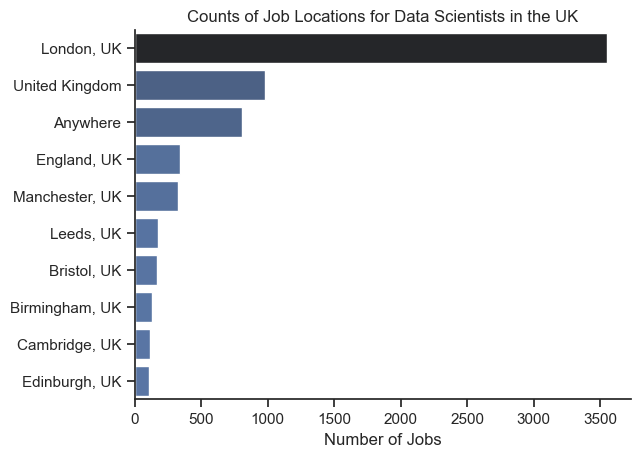

In [26]:
# 1_EDA - Job Location 
df_plot = df_DA_UK['job_location'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Counts of Job Locations for Data Scientists in the UK')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

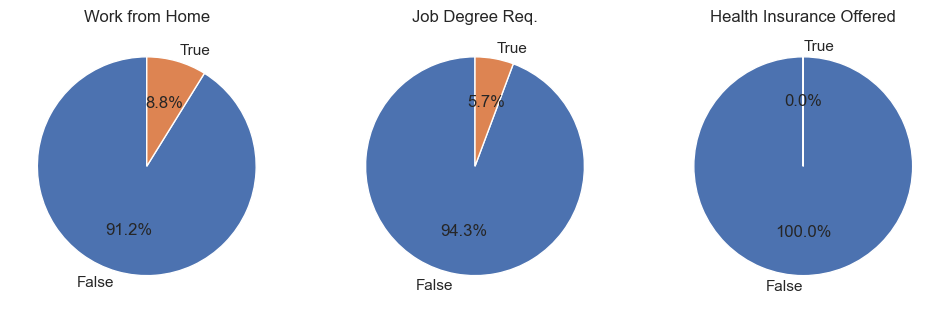

In [27]:
# 2_EDA - Job_work_from_home, job_no_degree_mention, job_health_insurance

dict_column = {
    'job_work_from_home': 'Work from Home',
    'job_no_degree_mention': 'Job Degree Req.',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3)
fig.set_size_inches((12, 5))

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_DA_UK[column].value_counts(), startangle=90, autopct='%1.1f%%', labels=['False', 'True'])
    ax[i].set_title(title)

plt.show()

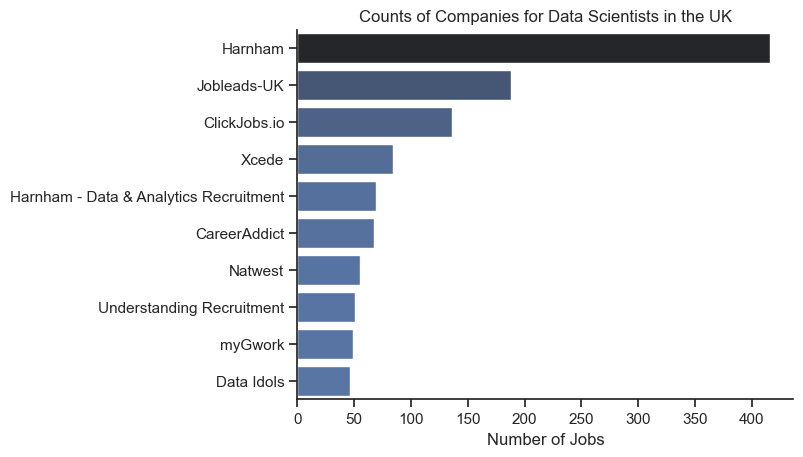

In [29]:
# 3_EDA - Company_name

df_plot = df_DA_UK['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Counts of Companies for Data Scientists in the UK')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()